# Urban-Eye YOLOv11 Training & Evaluation

This notebook walks through training and evaluating the YOLOv11 model on the Urban-Eye dataset, including baseline runs, synthetic data augmentation, hyperparameter tuning, and final comparative evaluation.


## 1. Environment Check

Ensure that a GPU is available and correctly configured before starting any training.


In [6]:
!nvidia-smi

Wed Apr 23 12:54:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA H100 80GB HBM3          On  |   00000000:CF:00.0 Off |                    0 |
| N/A   31C    P0            142W /  700W |   62474MiB /  81559MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

## 2. Import Dependencies & Verify Ultralytics Dependencies

Load the YOLO library and run internal checks to confirm everything is up to date.


In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.72  Python-3.10.16 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete  (20 CPUs, 31.9 GB RAM, 546.1/634.8 GB disk)


## 3. Configure Experiment Logging

Set up Comet.ml (or local) logging so that each training run is tracked under a clear experiment name.


In [9]:
#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']
import os
os.environ.pop("COMET_EXPERIMENT_NAME", None)
os.environ["COMET_MODE"] = "offline"
if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Note: you may need to restart the kernel to use updated packages.


Baseline with resized images
Baseline with resized images and synthetic images
improved with resized images
improved with resized images and synthetic images
improved with resized images and synthetic images and class weights

Datasets yamls:  
    urbanEye_synth_clsw.yaml  
    urbanEye-no-clsw-no-Synth.yaml  
    urbanEye-synth-no_clsw.yaml  
    urbanEye-no_synth-clws.yaml  

experiment 1: baseline model with resized images


## 4. Baseline with Resized Images

rain the out-of-the-box YOLOv11-L model on Urban-Eye with default settings to see the impact on convergence.


In [10]:
import os
os.environ.pop("COMET_EXPERIMENT_NAME", None)
os.environ["COMET_MODE"] = "offline"
os.environ["COMET_EXPERIMENT_NAME"] = "Urban-Eye-baseline"
from ultralytics import YOLO
# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # load an official model
print("=========================================================================")
result = model.train(cfg="cfg/default-no-reg.yaml", data="urbanEye-no-clsw-no-Synth.yaml")  # train with custom settings



New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=urbanEye-no-clsw-no-Synth.yaml, epochs=100, time=None, patience=100, batch=100, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=32, project=DL504, name=train49, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.65, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=

train: Scanning /workspace/datasets/urbanEye/dataset/labels/train.cache... 5511 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5511/5511 [00:00<?, ?it/s]
train: Caching images (6.3GB Disk): 100%|██████████| 5511/5511 [00:01<00:00, 3903.14it/s]
val: Scanning /workspace/datasets/urbanEye/dataset/labels/eval.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 2612.88it/s]


Plotting labels to DL504/train49/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to DL504/train49
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        65G      2.438      4.129      2.664         26        640: 100%|██████████| 56/56 [01:01<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]


                   all       1181       2981     0.0706      0.162     0.0563     0.0245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      66.2G      1.914      2.374       2.19         29        640: 100%|██████████| 56/56 [00:30<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.72it/s]

                   all       1181       2981      0.151      0.122     0.0933      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      66.2G      1.917      2.302      2.217         30        640: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]

                   all       1181       2981    0.00217      0.117    0.00155   0.000631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      66.2G      1.882      2.184      2.203         23        640: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all       1181       2981      0.295      0.194      0.139     0.0615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      66.1G      1.827      2.043      2.159         19        640: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all       1181       2981      0.108      0.137     0.0717     0.0296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      66.2G      1.766      1.869      2.106         17        640: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all       1181       2981      0.412      0.265      0.241      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      66.1G       1.72       1.73      2.064         17        640: 100%|██████████| 56/56 [00:29<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]

                   all       1181       2981      0.271      0.277      0.253       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      66.2G       1.67      1.594       2.03         22        640: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all       1181       2981      0.349      0.221      0.279      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      66.1G      1.599       1.45      1.966         36        640: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.279      0.319      0.292      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      66.3G      1.542      1.296      1.912         22        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.352      0.357      0.346       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      66.1G       1.48      1.172      1.858         27        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.427      0.247      0.334      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      66.2G      1.417      1.062      1.803         30        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all       1181       2981      0.479       0.38      0.342      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      66.2G      1.358     0.9695      1.751         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.409      0.349      0.359      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      66.1G      1.282     0.8786      1.679         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981      0.366      0.371      0.346      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      66.2G      1.218     0.7989      1.625         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981       0.41      0.298      0.324      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      66.2G      1.155     0.7523       1.57         18        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.458      0.365      0.393      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      66.2G        1.1     0.6902      1.519         28        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981        0.4      0.345      0.334      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      66.2G      1.051     0.6475      1.478         30        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.457      0.399      0.399      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      66.2G      0.993     0.6062       1.42         22        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.409      0.284      0.314       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      66.2G     0.9457     0.5722      1.383         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.433       0.32      0.342      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      66.3G     0.8995      0.535      1.339         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.385      0.329      0.351      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      66.2G     0.8611     0.5082      1.303         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.415      0.369      0.339      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      66.2G     0.8238     0.4877       1.27         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.376      0.341      0.319       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      66.2G     0.7744     0.4629      1.229         34        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.386      0.313       0.32      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      66.3G     0.7493     0.4419      1.205         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981       0.39      0.326       0.32      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      66.2G     0.7133     0.4221      1.173         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all       1181       2981      0.356      0.327      0.316      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      66.3G     0.6883     0.4011       1.15         30        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all       1181       2981      0.453      0.305      0.347      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      66.2G     0.6529     0.3863      1.118         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.496      0.284      0.312      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      66.2G     0.6311     0.3748        1.1         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.415      0.284      0.324      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      66.2G      0.606     0.3612      1.078         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.471      0.297      0.364      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      66.2G     0.5738     0.3432      1.052         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981      0.435      0.289      0.338      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      66.2G      0.553     0.3305      1.036         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.471      0.269       0.33      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      66.2G     0.5351     0.3194       1.02         23        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981      0.466      0.276      0.361      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      66.2G     0.5132     0.3091      1.003         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.435      0.234      0.327      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      66.2G     0.4913     0.2988     0.9847         46        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all       1181       2981      0.418      0.308      0.338      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      66.1G     0.4797     0.2902     0.9733         22        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all       1181       2981      0.465      0.231      0.339      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      66.2G     0.4567     0.2807     0.9591         17        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.447      0.261      0.338      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      66.3G      0.435     0.2692     0.9453         18        640: 100%|██████████| 56/56 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.465      0.259      0.349      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      66.2G     0.4274      0.266     0.9383         22        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.475      0.243      0.348      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      66.1G     0.4073     0.2552     0.9249         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981      0.503      0.279      0.382      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      66.1G     0.3952     0.2484      0.915         34        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.536      0.231      0.377      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      66.2G     0.3797     0.2412     0.9061         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981      0.552      0.218      0.381      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      66.2G     0.3675     0.2345     0.8983         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all       1181       2981      0.473       0.22      0.333      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      66.1G     0.3529     0.2282     0.8884         22        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all       1181       2981      0.567      0.241        0.4      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      66.2G     0.3375     0.2209     0.8799         18        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.507      0.208      0.351      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      66.3G     0.3267     0.2151     0.8737         18        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all       1181       2981      0.501       0.25      0.365      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      66.1G     0.3171     0.2098     0.8675         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.567      0.227      0.391        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      66.2G     0.3088     0.2067     0.8625         31        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.605      0.202      0.403      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      66.1G     0.2952     0.1985     0.8558         32        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.543      0.207      0.369      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      66.1G     0.2861     0.1944     0.8505         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.575       0.21      0.384      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      66.1G     0.2754     0.1882     0.8453         27        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.538      0.226      0.384      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      66.3G     0.2644     0.1835     0.8404         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981      0.564      0.209      0.389      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      66.2G       0.25     0.1774     0.8341         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all       1181       2981      0.508      0.206      0.356      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      66.2G     0.2473     0.1745     0.8308         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all       1181       2981      0.626      0.215       0.42      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      66.2G     0.2375     0.1694     0.8266         36        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all       1181       2981      0.694      0.216      0.453      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      66.1G     0.2251     0.1637     0.8219         34        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all       1181       2981      0.695      0.209      0.443      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      66.2G     0.2176     0.1596      0.819         23        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981       0.57      0.206      0.387      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      66.2G     0.2107     0.1558     0.8146         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981      0.558      0.203      0.383       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      66.2G     0.2096     0.1546     0.8159         35        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981      0.654      0.216      0.428      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      66.3G     0.1958     0.1485     0.8105         33        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981      0.551      0.206      0.375      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      66.1G     0.1886     0.1447     0.8068         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981      0.657      0.213      0.432      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      66.2G     0.1813     0.1411      0.805         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981      0.512      0.193      0.351      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      66.2G     0.1729     0.1366     0.8017         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981       0.65      0.209      0.432      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      66.2G     0.1671      0.134     0.7989         32        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981       0.55      0.195      0.374       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      66.2G      0.163     0.1307     0.7976         32        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all       1181       2981      0.673      0.205      0.442      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      66.2G      0.159     0.1283      0.796         35        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all       1181       2981      0.673      0.207      0.443      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      66.2G     0.1517     0.1247     0.7938         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all       1181       2981      0.654       0.21      0.428      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      66.3G     0.1452      0.121     0.7924         27        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all       1181       2981      0.594      0.203      0.396      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      66.1G     0.1423     0.1196     0.7913         41        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all       1181       2981      0.543        0.2      0.375      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      66.3G     0.1321     0.1147     0.7892         45        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.566      0.197      0.386      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      66.2G     0.1293     0.1127     0.7878         37        640: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.28it/s]

                   all       1181       2981      0.541        0.2      0.371       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      66.2G     0.1229     0.1088     0.7858         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.556      0.203      0.381      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      66.1G     0.1157     0.1048     0.7846         19        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all       1181       2981      0.576      0.203      0.391      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      66.2G     0.1148     0.1038     0.7844         17        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all       1181       2981      0.565      0.195      0.372      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      66.1G     0.1082     0.1004     0.7824         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.571        0.2      0.388      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      66.3G     0.1046    0.09806      0.782         19        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.564      0.198      0.383      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      66.2G     0.1004      0.096     0.7802         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.556      0.197      0.379        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      66.2G    0.09896     0.0949     0.7804         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.575      0.193      0.389      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      66.2G    0.09522    0.09279     0.7801         35        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.575      0.196      0.388      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      66.1G    0.09181    0.09034     0.7789         31        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.571      0.195      0.382      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      66.2G     0.0875     0.0877      0.779         31        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.564      0.196      0.381        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      66.1G    0.08402    0.08546     0.7771         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.574      0.194      0.384      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      66.2G    0.08214    0.08441     0.7773         35        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all       1181       2981      0.566      0.195      0.382      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      66.2G    0.07794    0.08201      0.777         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all       1181       2981      0.572      0.195      0.387        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      66.2G    0.07595    0.08026     0.7767         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.47it/s]

                   all       1181       2981      0.571      0.193      0.385      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      66.2G    0.07377    0.07894      0.776         32        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981       0.56      0.191       0.38      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      66.2G    0.07211    0.07761     0.7748         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.569      0.196      0.385      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      66.2G    0.07086    0.07683     0.7753         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.566      0.193      0.383        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      66.2G    0.06868    0.07548     0.7762         24        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.559      0.191      0.379      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      66.3G    0.06725    0.07432     0.7753         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]

                   all       1181       2981      0.567      0.192      0.382      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      66.2G    0.06597    0.07347     0.7758         26        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.566      0.192      0.381      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      66.3G    0.06552    0.07296     0.7742         40        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.571      0.194      0.385      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      66.2G    0.06359    0.07142     0.7745         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.565      0.192      0.382      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      66.2G    0.06416    0.07178     0.7744         29        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.567      0.192      0.382      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      66.2G    0.06274    0.07089     0.7741         25        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.565      0.192      0.382      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      66.1G    0.06222    0.07029      0.774         23        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.565      0.191      0.382      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      66.1G    0.06148    0.07006     0.7742         34        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981      0.567       0.19      0.382      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      66.2G    0.06155    0.06991     0.7732         23        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

                   all       1181       2981      0.561       0.19      0.378      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      66.3G    0.06087    0.06949     0.7743         27        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.566      0.189      0.382      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      66.2G    0.06056    0.06913     0.7738         37        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.567       0.19      0.381      0.197



100 epochs completed in 0.905 hours.
Optimizer stripped from DL504/train49/weights/last.pt, 51.2MB
Optimizer stripped from DL504/train49/weights/best.pt, 51.2MB

Validating DL504/train49/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]


                   all       1181       2981      0.697      0.216      0.456      0.246
              GRAFFITI         90        174      0.683      0.247       0.44      0.233
         FADED_SIGNAGE         10         11      0.444      0.364      0.433      0.159
              POTHOLES        168        373      0.442     0.0617       0.25      0.112
               GARBAGE        573       1315      0.602      0.192      0.383      0.175
     CONSTRUCTION_ROAD        164        421      0.781      0.356      0.583      0.263
        BROKEN_SIGNAGE         10         14          1     0.0714      0.536      0.268
         BAD_BILLBOARD        146        225      0.667      0.284      0.489      0.286
          SAND_ON_ROAD         77        112      0.609      0.125      0.366      0.146
      CLUTTER_SIDEWALK        163        316      0.744      0.405      0.557      0.288
         UNKEPT_FACADE         10         20          1       0.05      0.525      0.525
Speed: 0.0ms preproce

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : Urban-Eye-baseline
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [101]               : (6.8329164968482476e-06, 0.0006655347160431759)
COMET INFO:     lr/pg1 [101]               : (6.8329164968482476e-06, 0.0006655347160431759)
COMET INFO:     lr/pg2 [101]               : (6.8329164968482476e-06, 0.0006655347160431759)
COMET INFO:     metrics/mAP50(B) [101]     : (0.00155, 0.4562299051374282)
COMET INFO:     metrics/mAP50-95(B) [101]  : (0.00063, 0.2455621298820576)
COMET INFO:     metrics/precision(B) [101] : (0.00217, 0.6972471137024978)


## 6. Baseline + Synthetic Data

Augment the training set with synthetically generated examples of rare classes, then retrain.


## 6. Baseline + Customzied Augmentation

Augment the training set with synthetically generated examples of rare classes, then retrain.


| Augmentation      | Value              | Description                                                                                  |
|-------------------|--------------------|----------------------------------------------------------------------------------------------|
| Mosaic            | 1.0                | Combines four images into a single image to simulate complex backgrounds and varied object contexts. |
| MixUp             | 0.1                | Blends two images to create intermediate representations, improving generalization.          |
| HSV Adjustment    | H: 0.02, S: 0.7, V: 0.4 | Adjusts hue, saturation, and brightness to simulate diverse lighting scenarios.              |
| Rotation          | ±5°                | Slight rotations to mimic camera angle variations.                                           |
| Translation       | ±0.15              | Horizontal and vertical shifts to simulate varied object positions.                         |
| Scale             | ±0.5               | Varies object sizes to emulate different object distances.                                   |
| Horizontal Flip   | 0.5                | Flips images horizontally to diversify object orientation.                                  |
| Perspective       | 0.0                | Perspective distortion was disabled to maintain structural realism in urban scenes.         |




In [12]:
import os
os.environ.pop("COMET_EXPERIMENT_NAME", None)
os.environ["COMET_EXPERIMENT_NAME"] = "Urban-Eye-improved"
from ultralytics import YOLO
# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # load an official model
print("=========================================================================")
result = model.train(cfg="cfg/urbanyet-settings.yaml", data="urbanEye-no-clsw-no-Synth.yaml")  # train with custom settings



New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=urbanEye-no-clsw-no-Synth.yaml, epochs=500, time=None, patience=30, batch=100, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=32, project=DL504, name=train51, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.65, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using '/workspace/Smart-Surveillance-for-Cleaner-Cityscapes/.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


Class Weights in Use: None
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /workspace/datasets/urbanEye/dataset/labels/train... 5511 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5511/5511 [00:03<00:00, 1417.98it/s]


train: New cache created: /workspace/datasets/urbanEye/dataset/labels/train.cache


train: Caching images (6.3GB Disk): 100%|██████████| 5511/5511 [00:00<00:00, 32942.33it/s]

WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /workspace/datasets/urbanEye/dataset/labels/eval.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 18490.42it/s]


Plotting labels to DL504/train51/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00078125), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to DL504/train51
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500        66G      2.678      4.789      2.917         21        640: 100%|██████████| 56/56 [00:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all       1181       2981       0.14     0.0205     0.0751     0.0286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500        66G       2.01      2.646      2.231         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.185      0.176      0.157     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500        66G      2.016      2.555      2.177         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981      0.058     0.0264     0.0336      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      66.1G      2.064      2.653      2.234         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981    0.00962     0.0439    0.00566    0.00241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      66.1G      2.036      2.535      2.263         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981     0.0507     0.0362     0.0276     0.0109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      66.1G       2.01      2.457       2.26         19        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981       0.18     0.0786     0.0991     0.0428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      66.1G      1.977      2.386      2.244         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.107     0.0832     0.0718     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500        66G       1.96      2.322      2.226         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all       1181       2981      0.139      0.063     0.0887      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      66.1G      1.949      2.276      2.214         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981       0.24      0.162      0.179     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      66.1G      1.931      2.236      2.206         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.239      0.183      0.193      0.088



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      66.1G      1.917      2.181      2.194         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.242      0.174      0.191     0.0863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      66.1G      1.909      2.159      2.165         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.194     0.0954      0.134     0.0544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      66.1G      1.905      2.137      2.183         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all       1181       2981      0.157     0.0166     0.0849     0.0427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      66.1G      1.887      2.099      2.162         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all       1181       2981      0.441      0.201      0.316      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      66.1G      1.877       2.06      2.147         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.388       0.17      0.265      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      66.1G      1.867      2.037       2.14         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.386      0.246      0.301      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      66.1G      1.871      2.004      2.137         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.385       0.22      0.292      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500        66G      1.858      1.988       2.13         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.383      0.178      0.275      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      66.1G      1.849      1.975      2.109         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981      0.448      0.276      0.352      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      66.1G      1.834      1.947      2.098         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.38it/s]

                   all       1181       2981      0.389      0.154      0.268      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      66.1G      1.835      1.922      2.101         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981      0.355      0.178      0.253      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      66.1G      1.819      1.908      2.094         20        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981      0.466      0.235      0.355      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      66.1G       1.82      1.878      2.097         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all       1181       2981      0.505      0.219      0.353      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      66.1G       1.81      1.859      2.084         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981      0.417       0.29       0.34      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      66.1G      1.811      1.851      2.087         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981       0.49      0.251      0.358      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      66.1G      1.803      1.833      2.081         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.453      0.258      0.342      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      66.1G      1.797       1.81       2.07         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.358      0.288      0.314      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      66.1G      1.785      1.798      2.066         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all       1181       2981      0.436      0.328       0.38      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      66.1G      1.783      1.784      2.069         21        640: 100%|██████████| 56/56 [00:30<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all       1181       2981      0.457      0.295       0.37      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500        66G      1.776      1.763      2.056         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981      0.505      0.309      0.392      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      66.1G      1.764      1.745      2.042         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981      0.437      0.264      0.349       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      66.1G      1.769      1.729      2.047         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.538      0.321      0.423        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500        66G      1.762       1.72      2.045         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.515      0.253      0.383      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      66.1G      1.746      1.701      2.043         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.04it/s]

                   all       1181       2981      0.619      0.353      0.477      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      66.1G      1.754      1.677       2.05         19        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all       1181       2981      0.456       0.34      0.395      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      66.1G      1.749      1.659      2.027         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all       1181       2981      0.487      0.369      0.431      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      66.1G      1.733      1.636      2.015         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all       1181       2981       0.49      0.295      0.383      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      66.1G      1.732      1.629      2.024         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all       1181       2981      0.484      0.373      0.412      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      66.1G      1.726      1.611      2.016         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]

                   all       1181       2981      0.593      0.394      0.481      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500        66G      1.725      1.596          2         19        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.99it/s]

                   all       1181       2981       0.48      0.339      0.403      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      66.1G      1.716      1.577      2.002         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all       1181       2981      0.536      0.325      0.424      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      66.1G      1.714      1.577      2.001         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all       1181       2981       0.46      0.382       0.41      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      66.1G      1.706      1.553      1.989         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.582      0.406      0.497      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500        66G      1.697      1.529       1.98         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all       1181       2981      0.485      0.389      0.419      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      66.1G      1.694      1.518      1.988         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all       1181       2981      0.544      0.408      0.481       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      66.1G      1.696      1.501      1.982         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all       1181       2981      0.573      0.417      0.487      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      66.1G      1.682      1.487      1.979         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all       1181       2981      0.592      0.369      0.462      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500        66G      1.684      1.476      1.969         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all       1181       2981      0.511      0.372      0.428      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      66.1G      1.674       1.45      1.967         20        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all       1181       2981      0.581       0.42      0.497      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      66.1G      1.667      1.436      1.952         20        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all       1181       2981      0.517      0.399       0.45      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      66.1G      1.667      1.421      1.952         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all       1181       2981      0.541      0.408      0.474      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      66.1G      1.661      1.409      1.945         21        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all       1181       2981      0.547      0.339      0.447      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      66.1G      1.654      1.403      1.942         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.90it/s]

                   all       1181       2981      0.521      0.375      0.446      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500        66G      1.642      1.376      1.924         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all       1181       2981      0.559      0.412      0.486      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      66.1G      1.637      1.343      1.921         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all       1181       2981        0.5      0.458      0.477      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500        66G      1.635       1.34      1.927         20        640: 100%|██████████| 56/56 [00:29<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all       1181       2981       0.53      0.377      0.454      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      66.1G      1.617      1.328      1.912         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all       1181       2981      0.561      0.404      0.488      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500        66G      1.622      1.304      1.911         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all       1181       2981      0.551      0.432      0.485      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      66.1G      1.608      1.294      1.903         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all       1181       2981      0.523      0.484      0.495      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      66.1G      1.601       1.28      1.897         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all       1181       2981      0.575      0.407      0.491      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      66.1G      1.594      1.261      1.892         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all       1181       2981      0.511      0.413      0.452      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      66.1G      1.592      1.252      1.894         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.88it/s]

                   all       1181       2981      0.505      0.438      0.463      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      66.1G      1.569      1.232      1.869         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.75it/s]

                   all       1181       2981       0.53      0.459       0.49      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500        66G      1.576      1.215      1.874         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.87it/s]

                   all       1181       2981      0.565      0.436      0.496      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      66.1G       1.56      1.201      1.867         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.91it/s]

                   all       1181       2981      0.539        0.4      0.465      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      66.1G      1.565      1.198      1.861         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all       1181       2981       0.54      0.446      0.483      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      66.1G      1.558      1.171      1.852         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]

                   all       1181       2981      0.468      0.466      0.472      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      66.1G      1.547      1.171      1.859         21        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all       1181       2981      0.537      0.436      0.487      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      66.1G       1.55       1.14      1.851         20        640: 100%|██████████| 56/56 [00:28<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.97it/s]

                   all       1181       2981      0.618      0.408       0.51      0.238
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 39, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



69 epochs completed in 0.632 hours.
Optimizer stripped from DL504/train51/weights/last.pt, 51.2MB
Optimizer stripped from DL504/train51/weights/best.pt, 51.2MB

Validating DL504/train51/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]


                   all       1181       2981      0.593      0.394      0.481      0.244
              GRAFFITI         90        174      0.675      0.489      0.575      0.317
         FADED_SIGNAGE         10         11        0.5      0.364      0.463       0.25
              POTHOLES        168        373      0.486      0.236       0.35       0.15
               GARBAGE        573       1315       0.54      0.479       0.47      0.205
     CONSTRUCTION_ROAD        164        421      0.615      0.622      0.615       0.28
        BROKEN_SIGNAGE         10         14          1     0.0714      0.536      0.375
         BAD_BILLBOARD        146        225      0.477      0.462      0.478      0.245
          SAND_ON_ROAD         77        112      0.511      0.214       0.38      0.153
      CLUTTER_SIDEWALK        163        316      0.585      0.652      0.518      0.247
         UNKEPT_FACADE         10         20      0.538       0.35      0.428      0.216
Speed: 0.0ms preproce

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : Urban-Eye-improved
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [70]               : (0.003273809523809524, 0.009999120644285004)
COMET INFO:     lr/pg1 [70]               : (0.003273809523809524, 0.009999120644285004)
COMET INFO:     lr/pg2 [70]               : (0.003273809523809524, 0.009999120644285004)
COMET INFO:     metrics/mAP50(B) [70]     : (0.00566, 0.51006)
COMET INFO:     metrics/mAP50-95(B) [70]  : (0.00241, 0.24409)
COMET INFO:     metrics/precision(B) [70] : (0.00962, 0.61932)
COMET INFO:     metrics/recall(B) [70]    : (0.0

## 6. Baseline + Customzied Augmentation + Synthetic Images

In [13]:
import os
os.environ.pop("COMET_EXPERIMENT_NAME", None)
os.environ["COMET_EXPERIMENT_NAME"] = "Urban-Eye-improved-synth"
from ultralytics import YOLO
# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # load an official model
print("=========================================================================")
result = model.train(cfg="cfg/urbanyet-settings.yaml", data="urbanEye-synth-no_clsw.yaml")  # train with custom settings



New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=urbanEye-synth-no_clsw.yaml, epochs=500, time=None, patience=30, batch=100, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=32, project=DL504, name=train52, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.65, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using '/workspace/Smart-Surveillance-for-Cleaner-Cityscapes/.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


Class Weights in Use: None
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /workspace/datasets/urbanEye/dataset/labels/train... 6674 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6674/6674 [00:05<00:00, 1208.68it/s]


train: New cache created: /workspace/datasets/urbanEye/dataset/labels/train.cache


train: Caching images (7.6GB Disk): 100%|██████████| 6674/6674 [00:00<00:00, 22843.51it/s]

WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /workspace/datasets/urbanEye/dataset/labels/eval.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 23392.14it/s]


Plotting labels to DL504/train52/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00078125), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to DL504/train52
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500        66G       2.37      4.503      2.638        170        640: 100%|██████████| 67/67 [00:38<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981       0.12    0.00799     0.0638     0.0281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      66.1G      1.762      2.614      2.024        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.98it/s]


                   all       1181       2981        0.1     0.0386   0.000247   3.68e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      66.1G      1.887      2.699      2.098        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all       1181       2981   7.07e-05      0.005   3.05e-05   3.05e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      66.1G      2.033      2.972       2.29        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.76it/s]


                   all       1181       2981      0.101     0.0456    8.3e-05   2.76e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      66.1G      1.995      2.962        2.3        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all       1181       2981   0.000202     0.0527   0.000108   1.64e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      66.1G      1.956      2.805       2.24        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]

                   all       1181       2981   0.000603     0.0261   0.000312   5.27e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      66.1G      1.893      2.715      2.218        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.93it/s]

                   all       1181       2981   7.92e-05    0.00714   1.44e-05   1.44e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      65.7G      1.899      2.605      2.225        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.95it/s]

                   all       1181       2981        0.1     0.0418   7.35e-05   1.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      66.1G      1.839      2.485      2.144        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all       1181       2981        0.1     0.0418   7.35e-05   1.05e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      65.7G       1.82       2.39      2.153        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all       1181       2981      0.212     0.0345     0.0281     0.0185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      66.1G       1.78      2.334        2.1        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.313     0.0571      0.173     0.0502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      65.7G      1.746      2.211      2.091        170        640: 100%|██████████| 67/67 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.54it/s]

                   all       1181       2981     0.0621     0.0157     0.0374     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      66.1G      1.715      2.165      2.057        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all       1181       2981      0.331     0.0505      0.187     0.0889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      65.7G      1.726      2.121      2.036        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.165     0.0283     0.0882     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      66.1G      1.693      2.061       2.03        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all       1181       2981      0.245     0.0674      0.155     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      65.7G      1.685      2.062          2        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all       1181       2981      0.327     0.0716      0.195     0.0897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      66.1G      1.685      1.996      2.016        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.475      0.147      0.189      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      65.7G      1.678      1.973      2.004        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981      0.263     0.0828      0.165     0.0733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      66.1G      1.658       1.93      1.996        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all       1181       2981      0.333      0.137       0.21     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      65.7G      1.646      1.896      1.973        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981      0.293        0.2      0.231      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      66.1G      1.641       1.88      1.984        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.207      0.183      0.177     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      65.7G      1.634      1.871      1.979        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]

                   all       1181       2981      0.226     0.0275      0.126     0.0658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500        66G      1.623      1.833      1.965        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981      0.289     0.0961      0.188      0.091



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      65.7G      1.625      1.816      1.969        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.327       0.16       0.23      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      66.1G      1.613      1.787      1.955        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all       1181       2981      0.387      0.204      0.288      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      65.7G      1.603      1.789      1.949        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.363      0.167      0.245      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500        66G      1.603       1.76      1.945        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all       1181       2981      0.363      0.175      0.254      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      65.7G      1.594      1.726      1.947        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.41it/s]

                   all       1181       2981      0.438      0.137      0.279      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      66.1G      1.589      1.726       1.93        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981      0.363       0.21      0.279      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      65.6G      1.586      1.695      1.931        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all       1181       2981      0.274      0.137      0.187     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      66.1G      1.575      1.676      1.919        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all       1181       2981      0.433      0.187      0.307      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      65.7G      1.588      1.675      1.933        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981      0.424       0.19      0.299      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      66.1G      1.562      1.646      1.916        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all       1181       2981        0.4      0.103      0.248      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      65.7G      1.569      1.625      1.906        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981       0.34      0.131      0.222      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      66.1G      1.555      1.613      1.893        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all       1181       2981      0.458      0.198      0.317      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      65.7G      1.548      1.584      1.899        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all       1181       2981      0.397       0.21      0.294      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      66.1G      1.548       1.59      1.905        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981      0.438      0.127      0.278       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      65.7G      1.544      1.579      1.902        166        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all       1181       2981      0.397      0.204      0.299      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      66.1G      1.544      1.552      1.889        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all       1181       2981      0.464      0.206      0.339      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      65.7G      1.532      1.537      1.888        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981      0.652      0.187      0.417      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      66.1G       1.52      1.524      1.877        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.547       0.19      0.366      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      65.7G      1.528      1.516      1.871        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all       1181       2981      0.438      0.216      0.318      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      66.1G       1.53      1.508      1.874        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.92it/s]

                   all       1181       2981      0.523      0.262      0.389      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      65.7G      1.529      1.504      1.884        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all       1181       2981      0.547       0.27        0.4      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      66.1G      1.518      1.473      1.864        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all       1181       2981        0.4      0.242       0.32      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      65.7G      1.515      1.455      1.869        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.464      0.302      0.374      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      66.1G      1.499      1.443      1.852        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.507      0.174      0.336      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      65.7G      1.501      1.426      1.858        170        640: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all       1181       2981      0.529      0.239      0.378      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      66.1G      1.507      1.438      1.864        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.89it/s]

                   all       1181       2981      0.563      0.297      0.433      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      65.7G      1.499      1.413      1.856        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.482      0.254      0.369      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      66.1G      1.487      1.401       1.84        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.476      0.296       0.36      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      65.7G       1.49       1.39      1.854        177        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981       0.34      0.174      0.247      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      66.1G       1.48      1.378      1.833        172        640: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.30it/s]

                   all       1181       2981      0.564      0.232      0.383      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      65.7G      1.482      1.353      1.832        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.563      0.256      0.415      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      66.1G      1.478      1.367      1.837        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981      0.664      0.304      0.475      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      65.7G      1.477      1.344      1.835        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.537      0.339      0.434       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      66.1G      1.472      1.323      1.835        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all       1181       2981       0.58      0.337      0.445      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      65.7G      1.464      1.306      1.822        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all       1181       2981      0.585      0.329      0.463      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500        66G      1.467        1.3      1.829        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.579      0.379      0.479      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      65.7G      1.467      1.304      1.829        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981       0.56      0.308      0.433      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      66.1G       1.46      1.267      1.813        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.668      0.325      0.496      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      65.7G      1.445      1.268      1.816        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.573      0.312      0.439      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      66.1G      1.438      1.251      1.812        171        640: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.509       0.24      0.369      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      65.7G      1.443      1.241      1.803        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.592       0.36      0.466      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      66.1G      1.433      1.226      1.797        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.586      0.321      0.449      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      65.7G      1.435      1.219      1.789        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981       0.63      0.341       0.48      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      66.1G      1.426      1.204      1.792        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all       1181       2981      0.649      0.285      0.464      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      65.7G      1.423      1.209      1.787        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.593      0.343      0.459       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      66.1G      1.416      1.201      1.783        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981      0.587      0.375      0.479      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      65.7G      1.415      1.181      1.784        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.504      0.221      0.366      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      66.1G       1.41      1.162      1.776        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.653      0.329      0.489      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      65.7G      1.404      1.156      1.767        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.566        0.3      0.434       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      66.1G      1.402      1.146      1.767        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.626      0.381       0.51      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      65.7G      1.395      1.135      1.768        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all       1181       2981       0.62      0.379      0.499      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500        66G      1.377      1.113      1.757        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.585      0.414      0.493      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      65.7G      1.389      1.116      1.756        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.589       0.44      0.511      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      66.1G      1.383      1.093      1.752        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.584      0.395       0.48      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      65.6G      1.371      1.094      1.741        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.518      0.376       0.44      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      66.1G       1.37      1.079      1.737        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981       0.56      0.411      0.482      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      65.7G      1.374      1.061       1.75        166        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981        0.6      0.423      0.508      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      66.1G      1.361      1.059      1.735        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.631      0.421       0.52      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      65.7G      1.359      1.051      1.731        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.543       0.37      0.463      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      66.1G      1.355      1.037      1.723        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.526      0.414      0.476      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      65.7G      1.342      1.027      1.723        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981      0.572      0.441      0.505       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500        66G      1.341      1.029      1.719        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.542      0.431       0.49      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      65.7G      1.336      1.011       1.72        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.481       0.38      0.432      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      66.1G      1.337     0.9958      1.709        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.527      0.448      0.485      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      65.7G      1.332     0.9823      1.701        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.562      0.438      0.493      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      66.1G      1.333      0.983      1.703        178        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.579      0.456       0.51      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      65.7G       1.32     0.9738      1.702        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.602      0.459      0.531      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      66.1G      1.326     0.9874      1.701        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.538      0.462      0.494      0.234
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 61, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



91 epochs completed in 0.969 hours.
Optimizer stripped from DL504/train52/weights/last.pt, 51.2MB
Optimizer stripped from DL504/train52/weights/best.pt, 51.2MB

Validating DL504/train52/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]


                   all       1181       2981      0.669      0.325      0.496      0.266
              GRAFFITI         90        174        0.8      0.299      0.545      0.284
         FADED_SIGNAGE         10         11      0.444      0.364      0.399      0.184
              POTHOLES        168        373      0.466       0.22      0.336      0.149
               GARBAGE        573       1315      0.695      0.215      0.438      0.198
     CONSTRUCTION_ROAD        164        421      0.707      0.648      0.695      0.302
        BROKEN_SIGNAGE         10         14          1     0.0714      0.536      0.482
         BAD_BILLBOARD        146        225       0.61      0.418      0.528        0.3
          SAND_ON_ROAD         77        112      0.489      0.196      0.326      0.165
      CLUTTER_SIDEWALK        163        316      0.642      0.573      0.603        0.3
         UNKEPT_FACADE         10         20      0.833       0.25      0.553      0.294
Speed: 0.0ms preproce

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : Urban-Eye-improved-synth
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [92]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     lr/pg1 [92]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     lr/pg2 [92]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     metrics/mAP50(B) [92]     : (1e-05, 0.53071)
COMET INFO:     metrics/mAP50-95(B) [92]  : (0.0, 0.2658418176767533)
COMET INFO:     metrics/precision(B) [92] : (7e-05, 0.6687394920938632)
COMET INFO:     metrics/r

## 6. Baseline + Customzied Augmentation + Synthetic Images + Customized Loss calculation 

### Default Detection Loss Calculation
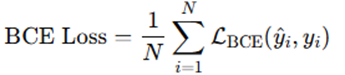

### Update Detection Loss Calculation
This formulation emphasizes learning for minority classes by increasing their contribution to the overall loss, helping the model better classify rare pollution types like "broken signage" or "bad streetlights."
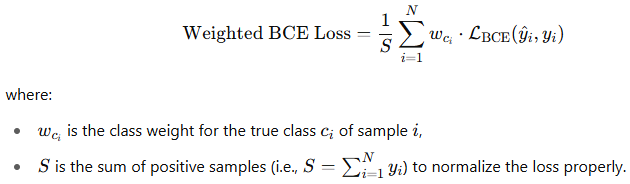

In [ ]:
import os
os.environ.pop("COMET_EXPERIMENT_NAME", None)
os.environ["COMET_EXPERIMENT_NAME"] = "Urban-Eye-improved-synth-clsw"
from ultralytics import YOLO
# Load a pretrained YOLOv8 model
model = YOLO('yolo11l.pt')  # load an official model
print("=========================================================================")
result = model.train(cfg="cfg/urbanyet-settings.yaml", data="urbanEye_synth_clsw.yaml")  # train with custom settings



New https://pypi.org/project/ultralytics/8.3.114 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=urbanEye_synth_clsw.yaml, epochs=500, time=None, patience=30, batch=100, imgsz=640, save=True, save_period=-1, cache=disk, device=0, workers=32, project=DL504, name=train53, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.65, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Using '/workspace/Smart-Surveillance-for-Cleaner-Cityscapes/.cometml-runs' path as offline directory. Pass 'offline_directory' parameter into constructor or set the 'COMET_OFFLINE_DIRECTORY' environment variable to manually choose where to store offline experiment archives.


Class Weights in Use: [1.113, 1.2724, 0.7967, 0.4402, 0.7812, 1.2749, 0.0, 1.0351, 1.1652, 0.8599, 1.2614]
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /workspace/datasets/urbanEye/dataset/labels/train.cache... 6674 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6674/6674 [00:00<?, ?it/s]
train: Caching images (7.6GB Disk): 100%|██████████| 6674/6674 [00:00<00:00, 21337.59it/s]

WARNING ⚠️ 'rect=True' is incompatible with DataLoader shuffle, setting shuffle=False



val: Scanning /workspace/datasets/urbanEye/dataset/labels/eval.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 16491.07it/s]


Plotting labels to DL504/train53/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.00078125), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to DL504/train53
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500        66G      2.382      4.051      2.653        170        640: 100%|██████████| 67/67 [00:37<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.103     0.0121     0.0506     0.0152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      66.1G      1.786       2.27      2.025        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981      0.101     0.0264   0.000205   7.89e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      66.1G      1.939      2.358      2.125        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981   0.000155     0.0109   3.93e-05    1.5e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      66.1G      2.083      2.551      2.283        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.84it/s]


                   all       1181       2981   3.56e-05     0.0739   1.75e-05   4.15e-06

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      66.1G      2.076      2.554      2.354        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.86it/s]


                   all       1181       2981        0.1     0.0218   4.73e-05   1.29e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      66.1G      1.993      2.474      2.293        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.00it/s]

                   all       1181       2981    0.00121     0.0711   0.000298   9.25e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      66.1G      1.968      2.338      2.253        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.02it/s]

                   all       1181       2981     0.0279      0.023      0.014    0.00517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      66.1G      1.901      2.237      2.204        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.05it/s]

                   all       1181       2981      0.203     0.0343    0.00322   0.000581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      65.7G      1.888      2.219      2.197        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.01it/s]

                   all       1181       2981      0.109      0.082     0.0215    0.00284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      66.1G       1.83      2.031      2.138        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.49it/s]

                   all       1181       2981      0.125    0.00268    0.00323     0.0011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      66.1G      1.805      2.006      2.139        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.268       0.11      0.156     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      66.1G      1.803      1.895      2.129        170        640: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981     0.0501     0.0154     0.0252    0.00756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      66.1G      1.743      1.829      2.068        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.59it/s]

                   all       1181       2981      0.272     0.0507      0.159     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      66.1G      1.754      1.805      2.063        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all       1181       2981      0.118     0.0502      0.072      0.037



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      66.1G      1.731      1.779      2.043        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.397      0.216      0.235     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      66.1G      1.719      1.726      2.024        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

                   all       1181       2981      0.308      0.067      0.181     0.0767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      66.1G      1.701      1.682      2.021        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.63it/s]

                   all       1181       2981      0.372     0.0482      0.206     0.0951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      66.1G      1.696       1.66      2.008        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.191     0.0824      0.122     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      66.1G      1.678      1.632      2.006        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]

                   all       1181       2981      0.255      0.101      0.167     0.0811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      66.1G      1.686      1.606      2.009        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.271      0.116      0.178     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      66.1G      1.666      1.584      2.009        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.40it/s]

                   all       1181       2981      0.263     0.0954      0.174     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      66.1G      1.662      1.561      1.995        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all       1181       2981      0.422      0.112      0.256      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      66.1G      1.647      1.577      1.982        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all       1181       2981      0.413      0.105      0.258      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      66.1G      1.646      1.508      1.973        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]

                   all       1181       2981      0.325       0.14      0.223      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      66.1G      1.642      1.509       1.98        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.56it/s]

                   all       1181       2981      0.285      0.108      0.197     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      66.1G       1.62      1.456       1.96        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.51it/s]

                   all       1181       2981      0.363      0.115      0.229      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500        66G      1.621      1.473      1.966        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.39it/s]

                   all       1181       2981      0.207      0.165      0.171     0.0794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      66.1G      1.623      1.449      1.964        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all       1181       2981      0.476     0.0788      0.269      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      66.1G      1.621       1.44      1.959        169        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]

                   all       1181       2981      0.289      0.115      0.192     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500        66G       1.61      1.419      1.947        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all       1181       2981      0.416      0.102      0.253      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      66.1G       1.61      1.385      1.946        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all       1181       2981       0.33     0.0914      0.207      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      65.7G      1.599      1.381      1.938        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.55it/s]

                   all       1181       2981      0.519      0.104      0.309      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      66.1G        1.6      1.375      1.935        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981      0.278      0.124      0.194     0.0892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      66.1G      1.581      1.354      1.925        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all       1181       2981      0.261     0.0751      0.166     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      66.1G      1.579      1.339      1.924        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all       1181       2981      0.429      0.101      0.263      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      66.1G      1.577      1.324      1.924        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981      0.423      0.177      0.296       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      66.1G       1.57      1.316       1.92        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]

                   all       1181       2981      0.155     0.0248     0.0891     0.0404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      66.1G      1.573      1.324      1.922        166        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.46it/s]

                   all       1181       2981       0.43      0.157      0.282      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      66.1G      1.572      1.291      1.908        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.57it/s]

                   all       1181       2981      0.461      0.134      0.299      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      66.1G      1.558      1.286      1.907        169        640: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.502      0.132      0.312      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      66.1G      1.548      1.274      1.904        171        640: 100%|██████████| 67/67 [00:35<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.354      0.169      0.257      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      66.1G      1.558      1.265      1.897        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]

                   all       1181       2981      0.418      0.135      0.271      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      66.1G      1.552      1.249      1.897        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]

                   all       1181       2981      0.519      0.174      0.339      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      66.1G      1.546      1.252      1.894        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.443      0.154      0.299      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      66.1G      1.546      1.221      1.891        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981      0.512      0.169      0.339      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      66.1G      1.537      1.216      1.888        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981        0.5      0.246      0.372      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      66.1G      1.532      1.199      1.883        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.35it/s]

                   all       1181       2981      0.589      0.198      0.382      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      66.1G      1.536      1.196      1.881        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]

                   all       1181       2981      0.607      0.192      0.395      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      66.1G      1.523      1.196      1.875        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all       1181       2981      0.526       0.24      0.374      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      66.1G      1.524      1.176      1.869        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all       1181       2981       0.61      0.234      0.411      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      66.1G      1.509      1.159      1.866        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.529      0.247      0.378      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      66.1G      1.511      1.143      1.868        177        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.23it/s]

                   all       1181       2981      0.594      0.258      0.406      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      66.1G      1.511      1.156      1.867        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.515      0.274      0.376      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      66.1G      1.502      1.141      1.856        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.596      0.251      0.427      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      65.7G      1.496       1.12      1.854        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981       0.46      0.202      0.318      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      66.1G      1.499      1.118      1.855        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all       1181       2981      0.562      0.273      0.415      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      66.1G      1.494      1.088      1.855        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981       0.61       0.31      0.448      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      66.1G      1.481       1.08      1.839        172        640: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all       1181       2981      0.585      0.294      0.418       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500        66G      1.481      1.076      1.838        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.603      0.292      0.432       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      66.1G      1.486      1.076      1.842        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.25it/s]

                   all       1181       2981       0.63      0.306      0.461      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      66.1G      1.478       1.07      1.826        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]

                   all       1181       2981      0.554      0.238      0.404      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      66.1G      1.465      1.066      1.834        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981      0.651      0.318      0.471      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      66.1G      1.466      1.054       1.83        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]

                   all       1181       2981       0.58      0.272      0.419      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      66.1G       1.47      1.044      1.826        168        640: 100%|██████████| 67/67 [00:33<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.524      0.286      0.404      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      66.1G      1.455      1.037      1.821        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all       1181       2981      0.651      0.291      0.469      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      66.1G      1.456      1.023      1.811        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all       1181       2981      0.644      0.315      0.489      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      66.1G      1.441      1.004      1.806        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.27it/s]

                   all       1181       2981      0.605      0.271       0.44      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      66.1G      1.441      1.002      1.799        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all       1181       2981      0.578      0.313      0.448      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      66.1G      1.444     0.9992      1.806        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.509       0.34      0.422       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      66.1G      1.432     0.9993        1.8        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]

                   all       1181       2981      0.634      0.338      0.487      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      66.1G      1.427     0.9778      1.792        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.17it/s]

                   all       1181       2981      0.598      0.387      0.496      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      66.1G      1.423     0.9618      1.784        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.625      0.316      0.476      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      66.1G      1.424     0.9618      1.795        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.21it/s]

                   all       1181       2981      0.614      0.328      0.467      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      66.1G      1.415     0.9498      1.789        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.20it/s]

                   all       1181       2981      0.561      0.303      0.424      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500        66G      1.413     0.9376      1.785        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.643       0.38      0.506      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      66.1G      1.401     0.9305      1.773        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.648      0.381      0.515      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      66.1G      1.404      0.919      1.767        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.16it/s]

                   all       1181       2981      0.633      0.348      0.501      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      65.6G      1.391     0.9037      1.761        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.96it/s]

                   all       1181       2981      0.611      0.399      0.505      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      66.1G      1.389     0.9073      1.754        175        640: 100%|██████████| 67/67 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.563      0.358      0.462      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      66.1G       1.39     0.8938      1.766        166        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981      0.577      0.354      0.465      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      66.1G       1.37     0.8924      1.753        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.612      0.403      0.501      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      66.1G      1.364     0.8667      1.744        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981      0.586      0.347      0.467      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      66.1G      1.378     0.8801      1.747        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.15it/s]

                   all       1181       2981      0.668      0.333        0.5      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      66.1G       1.35      0.864      1.734        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.649      0.384      0.516       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      66.1G      1.353     0.8539       1.73        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.581      0.392      0.491      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      66.1G      1.345     0.8373      1.729        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.598      0.417      0.514       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      66.1G       1.35     0.8394      1.723        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.618      0.406      0.508      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      66.1G      1.344     0.8409      1.718        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.617      0.399       0.51      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      66.1G      1.337     0.8169      1.714        178        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.578      0.403      0.495      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      66.1G      1.328     0.8238      1.707        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.13it/s]

                   all       1181       2981      0.572      0.402      0.493       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      66.1G      1.335     0.8165      1.715        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981       0.53      0.419       0.48      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500        66G      1.309     0.8035      1.694        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.615      0.428      0.521      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      66.1G      1.329     0.7996      1.701        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.604      0.415      0.522      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      66.1G      1.308     0.7825      1.689        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.638      0.442      0.552      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      66.1G       1.31     0.7878       1.69        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.596      0.429      0.511      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      66.1G      1.304     0.7646      1.677        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.596      0.426      0.508      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      66.1G      1.293     0.7637      1.671        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.06it/s]

                   all       1181       2981       0.57      0.429        0.5      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      66.1G       1.29     0.7549      1.667        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all       1181       2981      0.642      0.455      0.562       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      66.1G      1.284      0.756      1.671        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981       0.64      0.437      0.547      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      66.1G       1.27     0.7491      1.655        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.597      0.411      0.513      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      65.7G      1.271     0.7493      1.657        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.08it/s]

                   all       1181       2981      0.589      0.414       0.51      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      66.1G      1.257     0.7358      1.646        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.628      0.441       0.54      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      66.1G      1.254      0.734      1.648        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.602       0.45      0.532      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      66.1G      1.247     0.7156      1.635        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.561      0.416      0.496      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      66.1G      1.255     0.7221      1.635        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.591      0.431      0.523      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      66.1G       1.25     0.7226      1.641        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.596      0.465      0.535      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      66.1G      1.248     0.7163      1.633        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.649      0.432      0.537       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      66.1G       1.23     0.7032      1.624        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.631       0.44      0.546      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      66.1G      1.227     0.7038      1.612        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.637      0.445      0.545      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      66.1G      1.221     0.6998      1.615        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.608      0.441      0.519      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      66.1G      1.215     0.6887      1.612        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.614       0.45      0.545      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      66.1G      1.217     0.6903       1.61        169        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.594      0.444       0.53      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      66.1G      1.212     0.6872      1.604        167        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.615      0.439      0.526      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      66.1G      1.199     0.6797      1.603        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.613      0.464      0.547      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      66.1G      1.199     0.6717       1.59        172        640: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.575      0.441      0.493      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      66.1G       1.19     0.6633      1.584        173        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.18it/s]

                   all       1181       2981      0.609      0.447      0.528      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      66.1G      1.184     0.6663      1.578        176        640: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.637      0.449       0.54      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      66.1G      1.184     0.6554      1.575        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.617      0.463      0.539      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500        66G      1.185     0.6431      1.584        170        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]

                   all       1181       2981      0.621      0.432      0.532      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      66.1G      1.162     0.6363      1.561        175        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.09it/s]

                   all       1181       2981      0.596      0.443      0.529      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      66.1G      1.172     0.6404      1.564        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.11it/s]

                   all       1181       2981      0.633      0.453      0.545      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      66.1G      1.171     0.6458      1.557        168        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.10it/s]

                   all       1181       2981      0.603      0.444      0.524      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      66.1G      1.147     0.6421      1.546        171        640: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.609      0.443      0.519      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      65.7G      1.145     0.6279      1.552        174        640: 100%|██████████| 67/67 [00:34<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]

                   all       1181       2981      0.629       0.45      0.531      0.248
EarlyStopping: Training stopped early as no improvement observed in last 30 epochs. Best results observed at epoch 94, best model saved as best.pt.
To update EarlyStopping(patience=30) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



124 epochs completed in 1.315 hours.
Optimizer stripped from DL504/train53/weights/last.pt, 51.2MB
Optimizer stripped from DL504/train53/weights/best.pt, 51.2MB

Validating DL504/train53/weights/best.pt...
Ultralytics 8.3.72 🚀 Python-3.11.10 torch-2.6.0+cu124 CUDA:0 (NVIDIA H100 80GB HBM3, 81110MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]


                   all       1181       2981      0.637      0.442      0.552      0.262
              GRAFFITI         90        174      0.634      0.586      0.634      0.326
         FADED_SIGNAGE         10         11        0.4      0.364      0.492      0.227
              POTHOLES        168        373      0.531      0.298      0.367      0.141
               GARBAGE        573       1315      0.683      0.335       0.49      0.223
     CONSTRUCTION_ROAD        164        421      0.691      0.632      0.679      0.309
        BROKEN_SIGNAGE         10         14        0.8      0.286      0.571      0.269
         BAD_BILLBOARD        146        225      0.595      0.458      0.547       0.31
          SAND_ON_ROAD         77        112      0.577      0.366      0.471      0.209
      CLUTTER_SIDEWALK        163        316      0.662      0.693      0.682       0.33
         UNKEPT_FACADE         10         20        0.8        0.4      0.589      0.271
Speed: 0.0ms preproce

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : Urban-Eye-improved-synth-clsw
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [125]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     lr/pg1 [125]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     lr/pg2 [125]               : (0.0032835820895522386, 0.009999120644285004)
COMET INFO:     metrics/mAP50(B) [125]     : (2e-05, 0.56202)
COMET INFO:     metrics/mAP50-95(B) [125]  : (0.0, 0.26151944884065065)
COMET INFO:     metrics/precision(B) [125] : (4e-05, 0.6678)
COMET INFO:     metrics/r

## 7. Models Evaluation on Test Split

This cell performs the following steps:

1. **Import dependencies**  
   - Loads the Ultralytics `YOLO` class for model inference  
   - Uses `pandas` for organizing results and `tabulate` for pretty-printing tables  

2. **Define model checkpoints**  
   Maps descriptive names (e.g. “Urban-Eye-baseline”, “Urban-Eye-improved-synth-clsw”) to the corresponding `.pt` weight files.

3. **Set evaluation thresholds**  
   - `conf_thresholds`: list of confidence thresholds  
   - `iou_thresholds`: list of IoU thresholds  

4. **Run validation loop**  
   For each model and each combination of confidence and IoU threshold:
   - Calls `model.val(...)` on the `"test"` split  
   - Retrieves metrics:  
     - `mAP50` (AP at IoU=0.5)  
     - `mAP50-95` (AP averaged over IoU=0.5:0.95)  
     - `precision` (mean precision)  
     - `recall` (mean recall)  
   - Records the results and the output directory for each run  

5. **Aggregate and display results**  
   - Constructs a `DataFrame` from the collected records  
   - Prints a formatted results table showing each model’s performance metrics  



In [ ]:
from ultralytics import YOLO
import pandas as pd
from tabulate import tabulate
# Map descriptive names to your weight files
# models = {
#     "Urban-Eye-baseline":            YOLO("DL504/train49/weights/best.pt"),
#     "Urban-Eye-baseline-with-synth": YOLO("DL504/train50/weights/best.pt"),
#     "Urban-Eye-improved":            YOLO("DL504/train51/weights/best.pt"),
#     "Urban-Eye-improved-synth":      YOLO("DL504/train52/weights/best.pt"),
#     "Urban-Eye-improved-synth-clsw": YOLO("DL504/train53/weights/best.pt"),
# }
models = {
    "Urban-Eye-baseline":            YOLO("weights/urbanEye-1-baseline.pt"),
    "Urban-Eye-baseline-with-synth": YOLO("weights/urbanEye-2-baseline-synth.pt"),
    "Urban-Eye-improved":            YOLO("weights/urbanEye-3-augmented.pt"),
    "Urban-Eye-improved-synth":      YOLO("weights/urbanEye-4-improved-synth.pt"),
    "Urban-Eye-improved-synth-clsw": YOLO("weights/urbanEye-5-improved-synth-updated_loss.pt"),
}

# conf_thresholds = [0.25, 0.40, 0.55, 0.75]
# iou_thresholds = [0.30, 0.40, 0.50, 0.60]

conf_thresholds = [0.25]
iou_thresholds = [0.65]

# conf_thresholds = [0.25, 0.5, 0.75]
# iou_thresholds = [0.45, 0.5, 0.6]

records = []

for name, model in models.items():
    for conf in conf_thresholds:
        for iou in iou_thresholds:
            print(f"▶ Evaluating {name}")
            metrics  = model.val(
                data="urbanEye_synth_clsw.yaml", 
                cache="disk",
                split="test",
                conf=conf,
                iou=iou,
                plots=True
            )
            results = metrics.results_dict
            record = {
                "model": name,
                # "conf": conf,
                # "iou": iou,
                "mAP50": round(metrics.box.map50, 3),
                "mAP50-95": round(metrics.box.map, 3),
                "precision": round(metrics.box.mp, 3),
                "recall": round(metrics.box.mr, 3),
                "Dir": metrics.save_dir
            }


            records.append(record)

df = pd.DataFrame(records)
print(tabulate(df, headers="keys", tablefmt="grid", floatfmt=".3f"))


▶ Evaluating Urban-Eye-baseline
Ultralytics 8.3.72  Python-3.10.16 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 21664.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:21<00:00,  3.38it/s]


                   all       1181       3027      0.471      0.188      0.318       0.16
              GRAFFITI         97        171      0.778      0.287      0.521      0.279
         FADED_SIGNAGE         12         18      0.571      0.222      0.349      0.198
              POTHOLES        169        388      0.347     0.0438      0.187     0.0785
               GARBAGE        581       1310      0.597      0.193      0.386      0.177
     CONSTRUCTION_ROAD        157        401      0.733      0.329      0.533      0.236
        BROKEN_SIGNAGE          9         11          0          0          0          0
         BAD_BILLBOARD        165        233      0.667      0.292       0.48      0.275
          SAND_ON_ROAD         74        115      0.292     0.0609      0.167     0.0654
      CLUTTER_SIDEWALK        172        353      0.725      0.456      0.555      0.291
         UNKEPT_FACADE         14         27          0          0          0          0
Speed: 0.3ms preproce

val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 23549.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:20<00:00,  3.62it/s]


                   all       1181       3027      0.484      0.221      0.344      0.164
              GRAFFITI         97        171       0.69      0.351      0.536      0.259
         FADED_SIGNAGE         12         18      0.444      0.222      0.284      0.167
              POTHOLES        169        388      0.232     0.0335      0.126     0.0619
               GARBAGE        581       1310      0.637      0.201      0.408      0.178
     CONSTRUCTION_ROAD        157        401      0.689      0.441      0.556      0.212
        BROKEN_SIGNAGE          9         11        0.5     0.0909       0.32       0.16
         BAD_BILLBOARD        165        233      0.539      0.326      0.408      0.218
          SAND_ON_ROAD         74        115       0.22     0.0783      0.145     0.0681
      CLUTTER_SIDEWALK        172        353      0.639      0.431      0.499       0.24
         UNKEPT_FACADE         14         27       0.25      0.037      0.156     0.0779
Speed: 0.3ms preproce

val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 25109.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:21<00:00,  3.38it/s]


                   all       1181       3027      0.553      0.358      0.432       0.24
              GRAFFITI         97        171      0.645      0.456       0.57        0.3
         FADED_SIGNAGE         12         18      0.375      0.167      0.239      0.168
              POTHOLES        169        388      0.437      0.222      0.313      0.142
               GARBAGE        581       1310       0.52      0.462      0.467      0.198
     CONSTRUCTION_ROAD        157        401      0.564      0.613      0.575      0.247
        BROKEN_SIGNAGE          9         11          1     0.0909      0.545      0.545
         BAD_BILLBOARD        165        233      0.587      0.536      0.537      0.272
          SAND_ON_ROAD         74        115        0.4      0.191      0.266      0.101
      CLUTTER_SIDEWALK        172        353      0.602      0.694      0.544       0.27
         UNKEPT_FACADE         14         27        0.4      0.148       0.26       0.16
Speed: 0.3ms preproce

val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 23087.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:20<00:00,  3.52it/s]


                   all       1181       3027        0.6      0.293      0.443      0.211
              GRAFFITI         97        171      0.804      0.263      0.531      0.268
         FADED_SIGNAGE         12         18        0.5      0.222      0.372      0.198
              POTHOLES        169        388      0.467      0.219      0.317      0.126
               GARBAGE        581       1310       0.75      0.224      0.471       0.21
     CONSTRUCTION_ROAD        157        401      0.647      0.646      0.649      0.266
        BROKEN_SIGNAGE          9         11          1     0.0909      0.545      0.218
         BAD_BILLBOARD        165        233      0.624      0.421      0.524      0.293
          SAND_ON_ROAD         74        115       0.37      0.174      0.266      0.124
      CLUTTER_SIDEWALK        172        353      0.667      0.635      0.643      0.333
         UNKEPT_FACADE         14         27      0.167      0.037      0.116     0.0694
Speed: 0.3ms preproce

val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
val: Caching images (1.4GB Disk): 100%|██████████| 1181/1181 [00:00<00:00, 23853.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:21<00:00,  3.43it/s]


                   all       1181       3027       0.65      0.397      0.513       0.26
              GRAFFITI         97        171      0.611      0.532      0.587      0.314
         FADED_SIGNAGE         12         18        0.6      0.333        0.4      0.209
              POTHOLES        169        388      0.472      0.216      0.314      0.133
               GARBAGE        581       1310      0.703      0.329      0.502      0.219
     CONSTRUCTION_ROAD        157        401      0.663      0.671      0.659      0.277
        BROKEN_SIGNAGE          9         11      0.667      0.182      0.426      0.298
         BAD_BILLBOARD        165        233      0.645      0.468      0.556      0.311
          SAND_ON_ROAD         74        115      0.463      0.383      0.412      0.186
      CLUTTER_SIDEWALK        172        353      0.681      0.745       0.72      0.356
         UNKEPT_FACADE         14         27          1      0.111      0.556      0.299
Speed: 0.3ms preproce

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

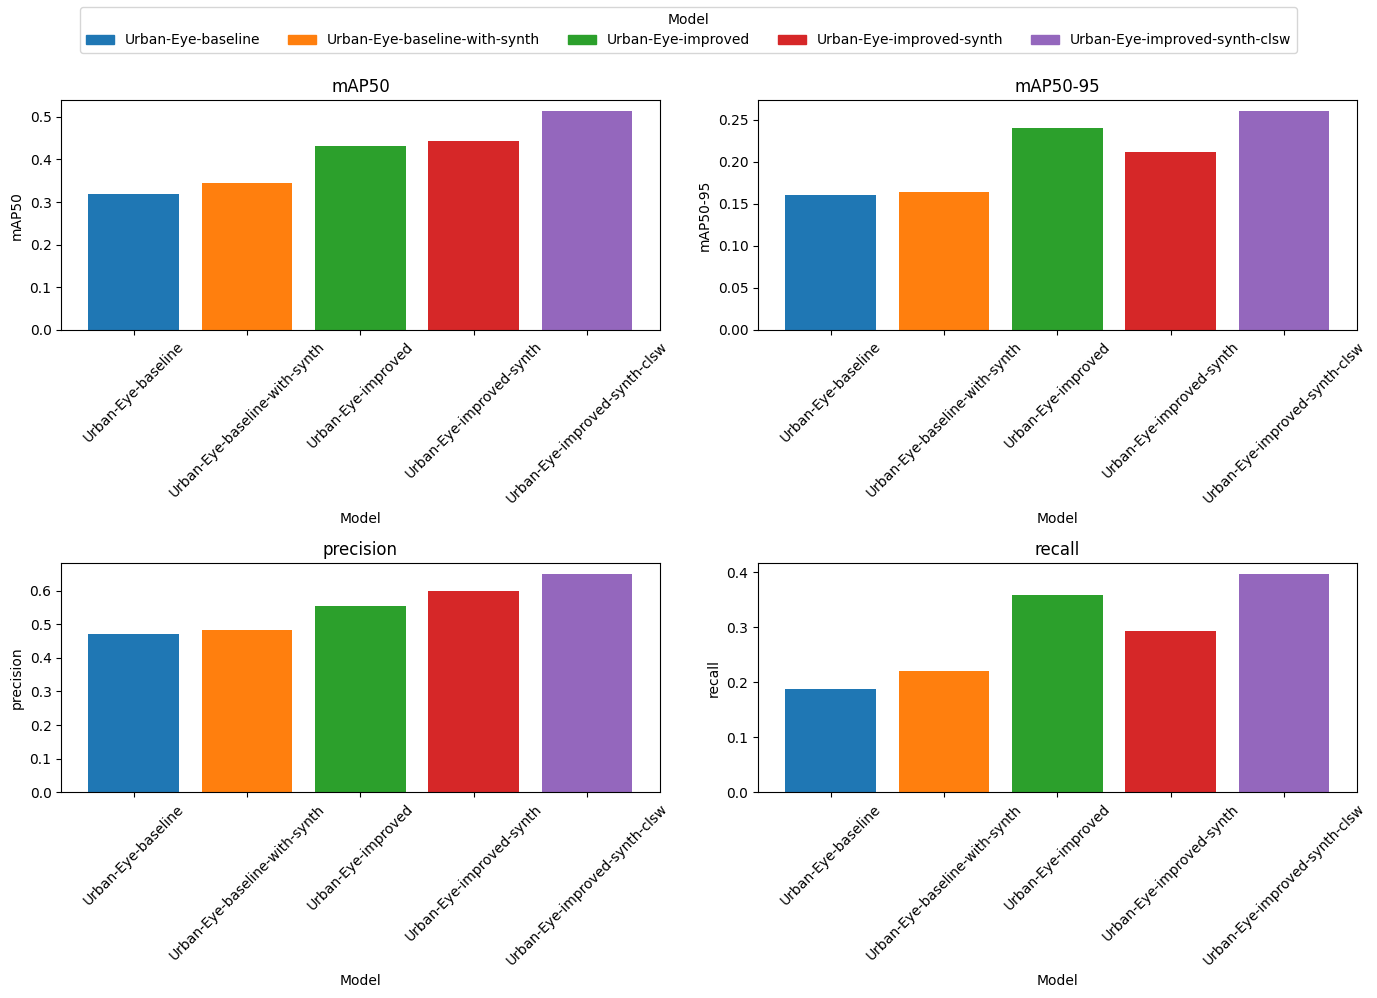

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# List of metrics and model names
metrics = ['mAP50', 'mAP50-95', 'precision', 'recall']
models_list = df['model'].tolist()

# Assign a distinct color to each model
colors = plt.cm.tab10.colors[:len(models_list)]
color_map = dict(zip(models_list, colors))

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    # Plot each model as its own colored bar
    for model in models_list:
        value = df.loc[df['model'] == model, metric].values[0]
        ax.bar(model, value, color=color_map[model])
    ax.set_title(metric)
    ax.set_xlabel('Model')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

# Add a single legend for all subplots
handles = [plt.Rectangle((0,0),1,1, color=color_map[m]) for m in models_list]
fig.legend(handles, models_list, title='Model', loc='upper center', ncol=len(models_list))

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


## 8. Best Model (`urbanEye-final.pt`) Evaluation on both Val & Test Splits

In [6]:
from ultralytics import YOLO


model = YOLO("urbanEye-final.pt")
# res = model.val(
#     data="urbanEye_synth_clsw.yaml",
#     split="test",
#     plots=True
# )
res = model.val(
    data="urbanEye_synth_clsw.yaml",
    split="val",
    conf=0.35,
    iou=0.65
)

res = model.val(
    data="urbanEye_synth_clsw.yaml",
    split="test",
    conf=0.35,
    iou=0.65
)

Ultralytics 8.3.72  Python-3.10.16 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
YOLO11l summary (fused): 464 layers, 25,287,793 parameters, 0 gradients, 86.6 GFLOPs


val: Scanning E:\python\datasets\urbanEye\dataset\labels\eval... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:02<00:00, 555.15it/s]


val: New cache created: E:\python\datasets\urbanEye\dataset\labels\eval.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:20<00:00,  3.56it/s]


                   all       1181       2981      0.691      0.375      0.544      0.264
              GRAFFITI         90        174       0.66      0.546      0.626      0.328
         FADED_SIGNAGE         10         11      0.444      0.364      0.506      0.234
              POTHOLES        168        373      0.579      0.188      0.354       0.14
               GARBAGE        573       1315      0.733      0.268      0.484      0.224
     CONSTRUCTION_ROAD        164        421      0.753      0.551      0.662      0.312
        BROKEN_SIGNAGE         10         14          1      0.214      0.607      0.301
         BAD_BILLBOARD        146        225       0.63      0.409      0.542      0.313
          SAND_ON_ROAD         77        112      0.667      0.286      0.474       0.22
      CLUTTER_SIDEWALK        163        316       0.69       0.62      0.662      0.327
         UNKEPT_FACADE         10         20       0.75        0.3      0.526      0.241
Speed: 0.3ms preproce

val: Scanning E:\python\datasets\urbanEye\dataset\labels\test.cache... 1181 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1181/1181 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:21<00:00,  3.41it/s]


                   all       1181       3027       0.69      0.357      0.512      0.264
              GRAFFITI         97        171      0.685      0.509      0.598      0.324
         FADED_SIGNAGE         12         18        0.6      0.333        0.4      0.209
              POTHOLES        169        388      0.538      0.144      0.323      0.154
               GARBAGE        581       1310      0.729       0.26      0.486      0.219
     CONSTRUCTION_ROAD        157        401      0.716      0.608      0.648      0.277
        BROKEN_SIGNAGE          9         11      0.667      0.182      0.426      0.298
         BAD_BILLBOARD        165        233      0.676      0.403      0.543      0.312
          SAND_ON_ROAD         74        115      0.554      0.313      0.424      0.193
      CLUTTER_SIDEWALK        172        353      0.737      0.705      0.714      0.354
         UNKEPT_FACADE         14         27          1      0.111      0.556      0.299
Speed: 0.3ms preproce